In [87]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load and read both files 
mouse_data_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_data_df = pd.read_csv("data/clinicaltrial_data.csv")

In [88]:
# Combine both files into a single dataset
combined_df = pd.merge(mouse_data_df, clinical_data_df, on="Mouse ID")

# Preview combined DataFrame
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [89]:
# Group data by Drug and Timepoint 
grouped_tumor = combined_df.groupby(["Drug", "Timepoint"])

# Create grouped DataFrame with the Mean Tumor Volume 
tumor_average_df = pd.DataFrame(grouped_tumor["Tumor Volume (mm3)"].mean()).reset_index()

# Preview the Mean of Tumor Volume DataFrame
tumor_average_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [90]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = grouped_tumor["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_df = pd.DataFrame(tumor_sem).reset_index() 

# Preview the Standard Error of Tumor Volume DataFrame
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [91]:
# Minor Data Munging to Re-Format the DataFrames
pivot_df = tumor_average_df.pivot(index="Timepoint", 
                                  columns="Drug", 
                                  values="Tumor Volume (mm3)")

# Preview the Reformatted DataFrame
pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


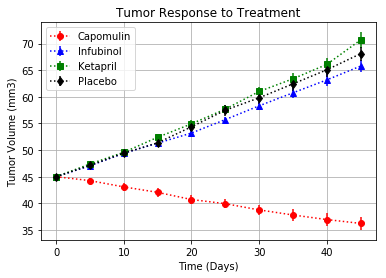

In [92]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_df.index, pivot_df["Capomulin"], yerr=tumor_sem["Capomulin"], fmt="o", ls=":", color="r")
plt.errorbar(pivot_df.index, pivot_df["Infubinol"], yerr=tumor_sem["Infubinol"], fmt="^", ls=":", color="b")
plt.errorbar(pivot_df.index, pivot_df["Ketapril"], yerr=tumor_sem["Ketapril"], fmt="s", ls=":", color="g")
plt.errorbar(pivot_df.index, pivot_df["Placebo"], yerr=tumor_sem["Placebo"], fmt="d", ls=":", color="black")

plt.title("Tumor Response to Treatment") # Display graph title
plt.xlabel("Time (Days)")                # Give graph x axis labels
plt.ylabel("Tumor Volume (mm3)")         # Give graph y axis labels
plt.legend(loc="best")                   # Display legend in best available location
plt.grid()                               # Display grid

# Save and show the Figure
plt.savefig("01_treatment_tumor_response.png")
plt.show()

## Metastatic Response to Treatment

In [93]:
# Create DataFrame with the Mean Metastatic Sites data Grouped by Drug and Timepoint
met_average_df = pd.DataFrame(grouped_tumor["Metastatic Sites"].mean()).reset_index()

# Preview the Mean Met Sites DataFrame
met_average_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [94]:
# Store the Standard Error of Met. Sites Grouped by Drug and Timepoint
met_sem = grouped_tumor["Metastatic Sites"].sem()

# Convert to DataFrame
met_sem_df = pd.DataFrame(met_sem).reset_index() 

# Preview the Stand Error of Met Sites DataFrame
met_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [95]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_df = met_average_df.pivot(index="Timepoint", 
                                    columns="Drug", 
                                    values="Metastatic Sites")

# Preview the Reformatted DataFrame
pivot_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


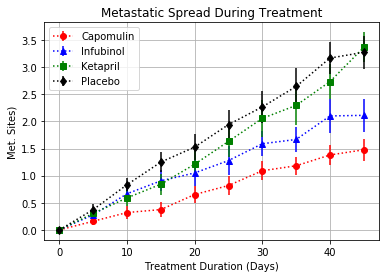

In [96]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_met_df.index, pivot_met_df["Capomulin"], yerr=met_sem["Capomulin"], fmt="o", ls=":", color="r")
plt.errorbar(pivot_met_df.index, pivot_met_df["Infubinol"], yerr=met_sem["Infubinol"], fmt="^", ls=":", color="b")
plt.errorbar(pivot_met_df.index, pivot_met_df["Ketapril"], yerr=met_sem["Ketapril"], fmt="s", ls=":", color="g")
plt.errorbar(pivot_met_df.index, pivot_met_df["Placebo"], yerr=met_sem["Placebo"], fmt="d", ls=":", color="black")

plt.title("Metastatic Spread During Treatment") # Display graph title
plt.xlabel("Treatment Duration (Days)")         # Give graph x axis labels
plt.ylabel("Met. Sites)")                       # Give graph y axis labels
plt.legend(loc="best")                          # Display legend in best available location
plt.grid()                                      # Display grid

# Save and show the Figure 
plt.savefig("02_treatment_metastic_spread.png")
plt.show()

## Survival Rates

In [97]:
# Store the Count of Mice Grouped by Drug and Timepoint
mice_count = grouped_tumor["Mouse ID"].count()

# Convert to DataFrame
mice_cont_df = pd.DataFrame(mice_count).reset_index()

# Rename Mouse ID column to Mouse Count
mice_cont_df = mice_cont_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview the Count of Mice DataFrame
mice_cont_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [99]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot_df = mice_cont_df.pivot(index="Timepoint", 
                                   columns="Drug", 
                                   values="Mouse Count")

# Preview the Reformatted DataFrame
mice_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


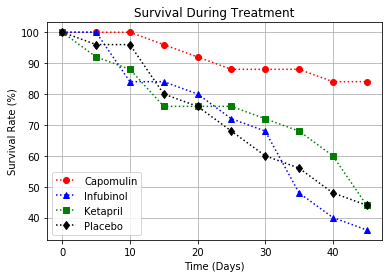

In [100]:
# Generate the Plot (Accounting for percentages)
total_mouse = mice_count["Capomulin"][0]
survival_rate = pd.DataFrame(mice_pivot_df/total_mouse)*100

plt.errorbar(survival_rate.index, survival_rate["Capomulin"], fmt="o", ls=":", color="r")
plt.errorbar(survival_rate.index, survival_rate["Infubinol"], fmt="^", ls=":", color="b")
plt.errorbar(survival_rate.index, survival_rate["Ketapril"], fmt="s", ls=":", color="g")
plt.errorbar(survival_rate.index, survival_rate["Placebo"], fmt="d", ls=":", color="black")

plt.title("Survival During Treatment") # Display graph title
plt.xlabel("Time (Days)")              # Give graph x axis labels
plt.ylabel("Survival Rate (%)")        # Give graph y axis labels
plt.legend(loc="best")                 # Display legend in best available spot
plt.grid()                             # Display grid

# Save and Show the Figure
plt.savefig("03_treatment_survival.png")
plt.show()

## Summary Bar Graph

In [103]:
# Calculate the percentages of changes for each drug
percentage_change = round((pivot_df.iloc[-1]/(pivot_df.iloc[0])-1)*100,2)

# Display the data
percentage_change

Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

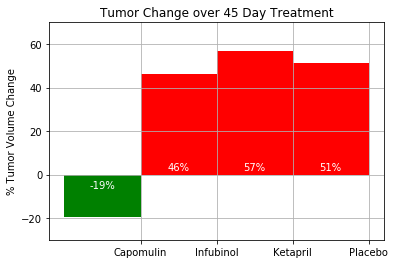

In [104]:
# Store all Relevant Drugs and Percent Changes into lists
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
change_list = [percentage_change["Capomulin"],
               percentage_change["Infubinol"],
               percentage_change["Ketapril"],
               percentage_change["Placebo"]]

# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Generate bar plot with orient widths, labels, tick marks, etc. 
change_bar = plt.bar(drug_list, change_list, 
                     width=-1, align="edge", 
                     color=passing.map({True:"g",False:"r"}))

plt.title("Tumor Change over 45 Day Treatment") # Display bar title
plt.ylabel("% Tumor Volume Change")             # Give bar y axis labels
plt.ylim(-30,70)                                # Set the y-limits of the current axes
plt.grid()                                      # Display grid

# Use functions to label the percentages of changes
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            label_position = 1
        else:
            label_position = -7
        plt.text(bar.get_x() + bar.get_width()/2., 
                 label_position,
                 "%d" % int(height)+"%",
                 color='white',
                 ha="center",va="bottom")

# Call functions to implement the function calls
autolabel(change_bar)

# Save and Show the Figure
plt.savefig("04_treatment_tumor_change_over_45day.png")
plt.show()